## Load Stuff

In [11]:
import torch
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

### Load Model

In [26]:
checkpoint_path = '/Users/james/playground/mario-gpt/notebooks/Mario-GPT2-700-context-length/iteration_989/'
base = "distilgpt2"
mario_lm = MarioLM(lm_path=checkpoint_path, tokenizer_path=base)

Using /Users/james/playground/mario-gpt/notebooks/Mario-GPT2-700-context-length/iteration_989/ lm
Using distilgpt2 tokenizer


### Load Dataset (Optional)

In [3]:
dataset = MarioDataset(mario_lm.tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





#### View string representation of level

In [4]:
view_level(dataset.input_ids[:700], mario_lm.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

#### Image

##### Previewing the first 50 columns of the dataset

/Users/james/Envs/research3.11/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


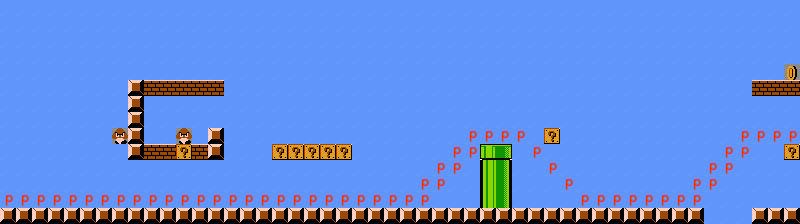

In [5]:
img = convert_level_to_png(dataset.input_ids[:700],  mario_lm.tokenizer)[0]
img

#### Set device

In [27]:
device = torch.device('cpu')
mario_lm = mario_lm.to(device)
print(torch.__version__)

2.1.0


## Generating Levels

In [36]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]

##### We generate 1399 predictions for an even 1400 output (including the input seed which is just a single block). Mario Levels have height of 14, so we generate 100 columns. You don't have to worry about perfect dimensions, we'll trim the remainder for you!

In [37]:
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=1.0,
    use_tqdm=True
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 13: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1400/1400 [03:58<00:00,  5.87it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (0, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (1, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (2, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (3, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (4, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (5, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (6, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (7, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (8, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606450> (9, 0)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x2ED606

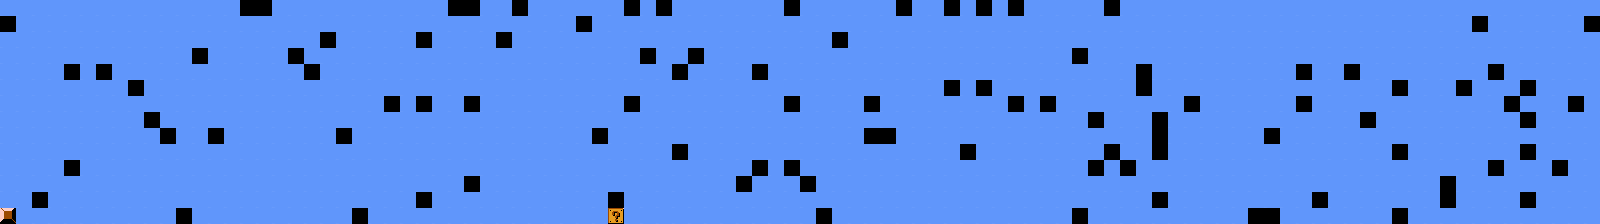

In [38]:
generated_level.img

#### Check if the model generated the correct level
##### Because of the stochastic nature of the model and the small training dataset, the model may generate levels that do not completely match the given prompt

In [32]:
generated_level.prompt

'no pipes, no enemies, little blocks, low elevation'

## Play Levels Interactively

In [20]:
generated_level.play()

Playing level interactively -- /tmp/tmpnveevydo.txt!
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Run Astar Agent

In [26]:
generated_level.run_astar()

Running Astar agent on level! -- /tmp/tmpw0ril9xa.txt
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Continue generation

### You can also continue generation, making giant levels

In [34]:
# different prompt
prompts = ["no pipes, some enemies, some blocks, high elevation"]

In [38]:
generated_level_continued = mario_lm.sample(
    seed=generated_level,
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([1, 685]), torch.Size([1, 2800]) first: 56, last: 13: 100%|█████| 1400/1400 [00:30<00:00, 45.35it/s]
/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/Pillow-9.1.1-py3.9-linux-x86_64.egg/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


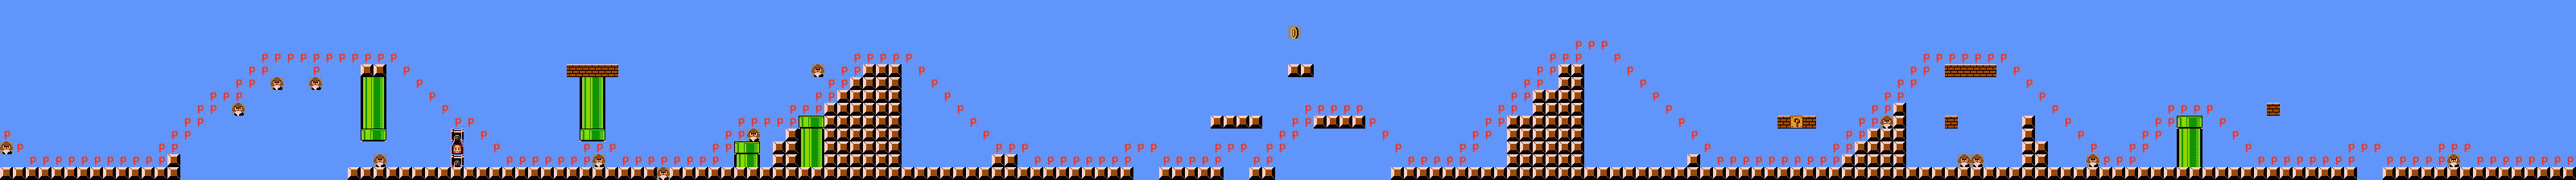

In [39]:
generated_level_continued.img

In [42]:
generated_level_continued.run_astar()

Running Astar agent on level! -- /tmp/tmpdaalo9xl.txt
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Batch multiple prompts

In [72]:
prompts = ["no pipes, many enemies, some blocks, high elevation", "many pipes, no enemies, many blocks, high elevation", "many pipes, many enemies, little blocks, low elevation"]

generated_levels = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)

shape: torch.Size([3, 672]), torch.Size([3, 1401]) first: 56, last: 13: 100%|█████| 1400/1400 [01:01<00:00, 22.84it/s]


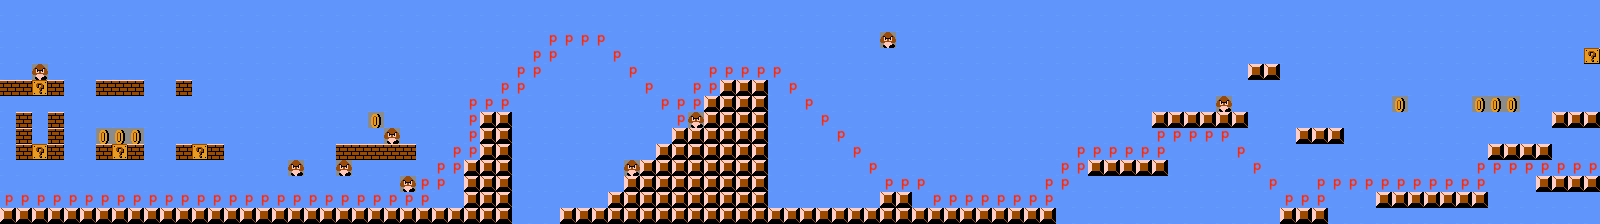

In [73]:
generated_levels[0].img

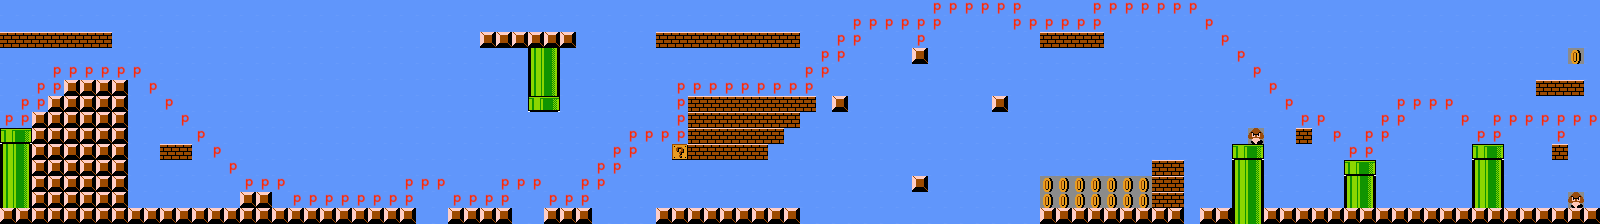

In [74]:
generated_levels[1].img

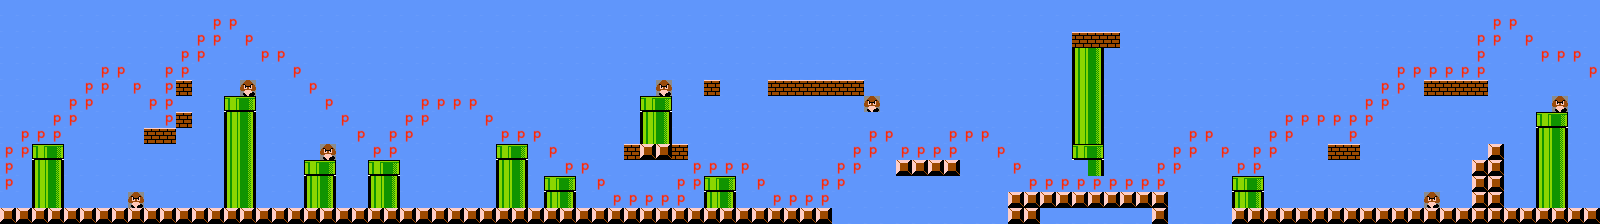

In [75]:
generated_levels[2].img

### Generate Timelapses

In [76]:
from mario_gpt.utils import generate_timelapse

In [79]:
timelapse_0 = generate_timelapse(generated_levels[0].level_tensor, mario_lm)

In [80]:
timelapse_1 = generate_timelapse(generated_levels[1].level_tensor, mario_lm)

In [81]:
timelapse_2 = generate_timelapse(generated_levels[2].level_tensor, mario_lm)

In [82]:
# save
# import imageio
# imageio.mimsave('timelapse_0.gif',timelapse_0,fps=60)